In [1]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import os
os.chdir('../src/')
from data_treatment import update_dataframe
from make_figures import do_SR, do_SR_mesa
%matplotlib inline

df_deltaA =pd.read_json("../data/EDO_DELTA_AMACURO.json",lines=True)
df_Merida =pd.read_json("../data/EDO_MERIDA.json",lines=True)
df_Vargas =pd.read_json("../data/EDO_VARGAS.json",lines=True)
df_MONAGAS =pd.read_json("../data/EDO_MONAGAS.json",lines=True)
df_MIRANDA =pd.read_json("../data/EDO_MIRANDA.json",lines=True)

In [2]:
variables = [u'ABSTENCION', u'ACTAS', u'ACTAS ESCRUTADAS', u'ACTAS VALIDAS',
     u'ELECTORES ACTAS TRANSMITIDAS', u'ELECTORES INSCRITOS',
       u'VOTANTES ESCRUTADOS', u'VOTOS ESCRUTADOS', u'VOTOS NULOS',
       u'VOTOS VALIDOS', u'centro', u'estado', u'mesa',u'municipio', u'parroquia','Abstencion_%',
       u'PSUV_%',u'PSUV_N',u'MUD_%',u'MUD_N', u'rescaled_N',u'parroquia_residual',
       u'municipio_residual',u'centro_residual',u'estado_residual',
       u'parroquia_standarised_residual', u'municipio_standarised_residual',u'centro_standarised_residual',
          u'estado_standarised_residual']
#DATA PROCESING
#DELTA AMACURO
df_out_deltaAmacuro = update_dataframe(df_deltaA,'LIZETA HERNANDEZ','LARISSA GONZALEZ')[variables]
#MONAGAS
df_out_MONAGAS = update_dataframe(df_MONAGAS,'YELITZE SANTAELLA','GUILLERMO CALL')[variables]
#MERIDA
df_out_Merida = update_dataframe(df_Merida,'JEHYSON GUZMAN','RAMON GUEVARA')[variables]
# VARGAS
df_out_Vargas = update_dataframe(df_Vargas, 'JORGE GARCIA CARNEIRO', 'JOSE MANUEL OLIVARES')[variables]
# MIRANDA
df_out_MIRANDA = update_dataframe(df_MIRANDA, 'HECTOR RODRIGUEZ', 'CARLOS OCARIZ')[variables]

frames = [df_out_Merida,df_out_deltaAmacuro,df_out_MONAGAS,df_out_Vargas,df_out_MIRANDA]
df_out = pd.concat(frames)

# Data:

Results from Merida, Vargas, Monagas and Delta Amacuro.

Data unit is the result in each 'mesa' of an electoral centre. 

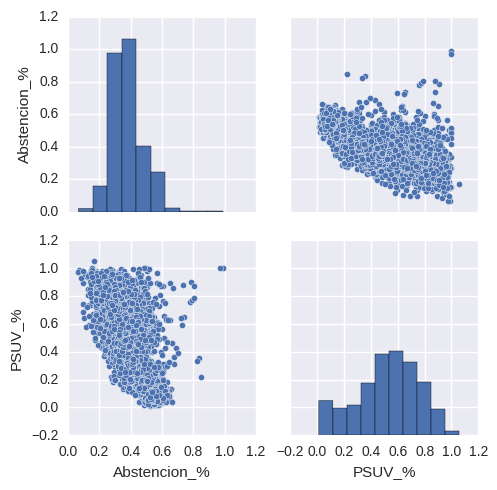

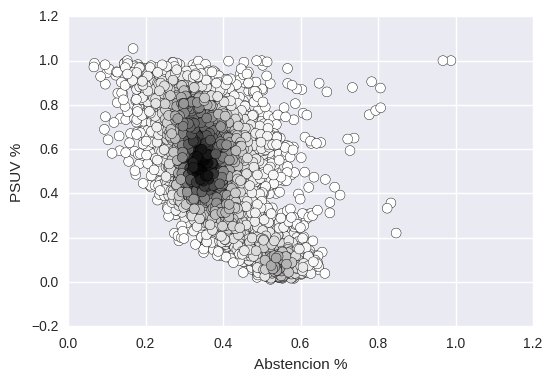

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

sns.pairplot(df_out,vars=['Abstencion_%','PSUV_%']);

fig, ax = plt.subplots()
xy = np.vstack([df_out['Abstencion_%'], df_out['PSUV_%']])
z = gaussian_kde(xy)(xy)
ax.scatter(df_out['Abstencion_%'], df_out['PSUV_%'], c=z, s=50)
plt.xlabel('Abstencion %')
plt.ylabel('PSUV %')
plt.show()


# Metrics:

Main metric is the Standarised residuals (SR) or Z-score:


residual_centro = $(1 -\frac{\%Psuv_{mesa}}{\%Psuv_{centro}})$ 

residual_parroquia = $(1 -\frac{\%Psuv_{mesa}}{\%Psuv_{parroquia}})$

$\underline{Standarised Residual}$ = $\frac{residual}{\sigma_{residual}}$ for each level (centro, parroquia, municipio...)

Deviations in favour of PSUV are shown on negative values of SR.

# Standarised residual for each mesa with respect to its centro (only centros with more than 1 'mesa'):

Gaussian distribution, if an external source affects the result in a 'mesa', it will affect the whole 'centro electoral'.

No large relative effect observed (slight tails), this can be our control sample. 


inclusive data (all mesas)
mean  -0.0361743220373
std  1.00121884592


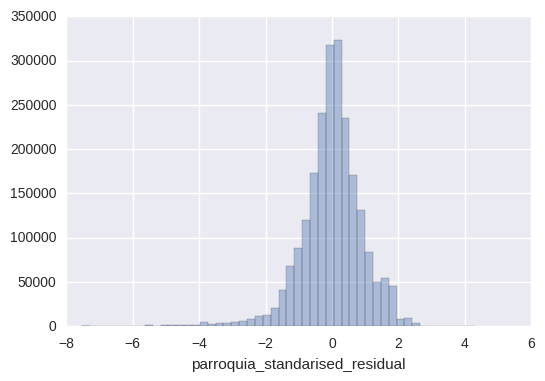

In [4]:
do_SR(df_out)

# Standarised residual for each mesa with respect to its 'parroquia':

Observing slighly larger tails on the negative side, where PSUV would show larger percentange of votes wrt the result in the parroquia.

All histograms are normalised by number of valid votes in the centre.


inclusive data (all mesas)
mean  -0.0361743220373
std  1.00121884592


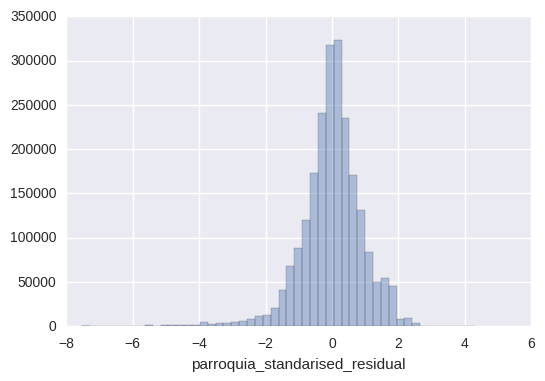

In [5]:
do_SR(df_out)


centros with only 1 mesa:
mean  -0.624157759418
std  1.03099922448

centros with more than 1 mesa:
mean 0.107684894774
std 0.939438679853


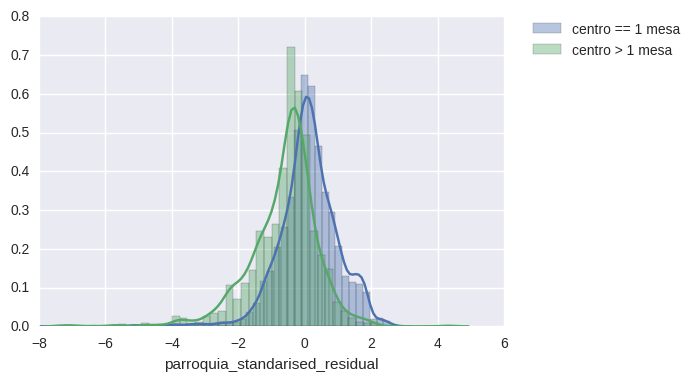

In [6]:
do_SR_mesa(df_out)


# RESULTS PER STATE:

Effect changes from state to state:
## MERIDA

Visible asymmetry on tails for the parroquia SR.

inclusive data (all mesas)
mean  -0.0792822034186
std  1.0


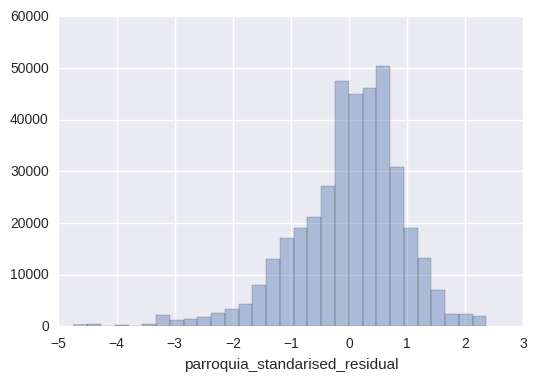

In [7]:
do_SR(df_out_Merida)

centros with only 1 mesa:
mean  -0.622097384895
std  1.14206188788

centros with more than 1 mesa:
mean 0.104439858004
std 0.874582294479


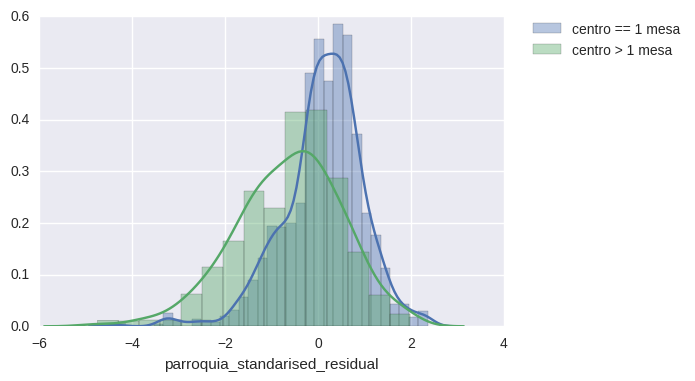

In [8]:
do_SR_mesa(df_out_Merida)

## VARGAS

inclusive data (all mesas)
mean  -0.0509660455604
std  1.0


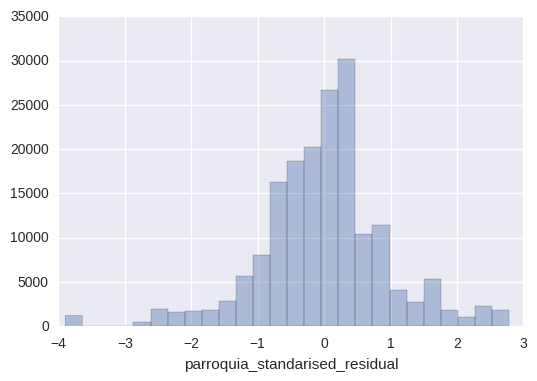

In [9]:
do_SR(df_out_Vargas)

centros with only 1 mesa:
mean  -0.795549370494
std  0.982239135124

centros with more than 1 mesa:
mean 0.147999746502
std 0.907659795159


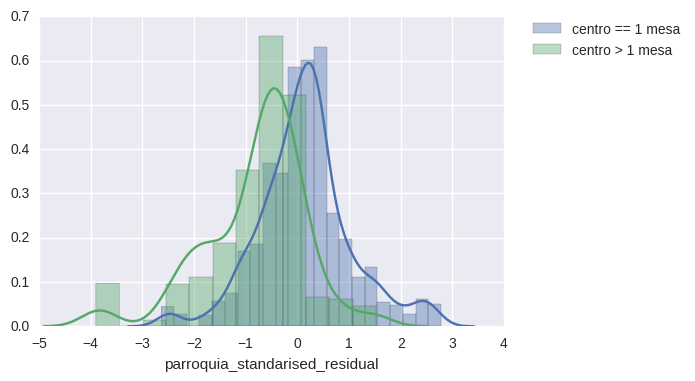

In [10]:
do_SR_mesa(df_out_Vargas)

## MONAGAS

inclusive data (all mesas)
mean  -0.101190667188
std  1.0


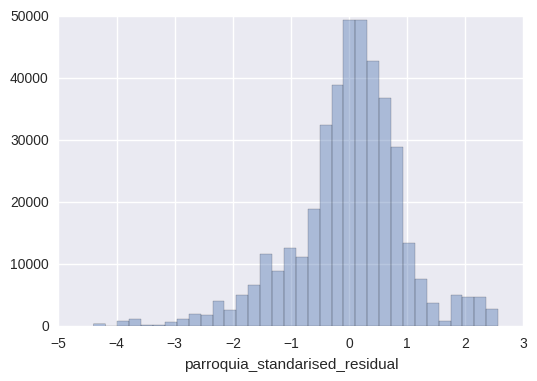

In [11]:
do_SR(df_out_MONAGAS)

centros with only 1 mesa:
mean  -0.818067740559
std  1.02378704387

centros with more than 1 mesa:
mean 0.160991996474
std 0.85246242578


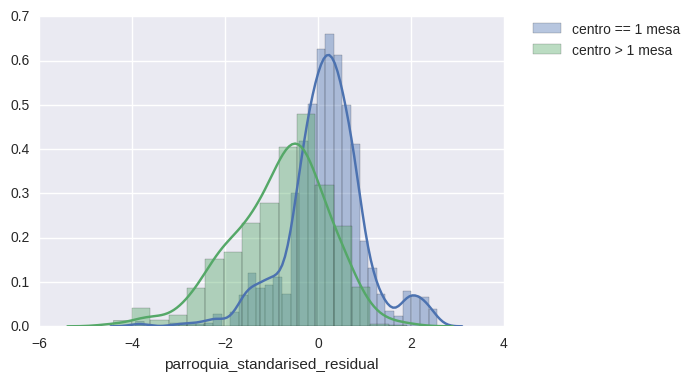

In [12]:
do_SR_mesa(df_out_MONAGAS)

## Delta Amacuro

inclusive data (all mesas)
mean  -0.168656530115
std  1.0


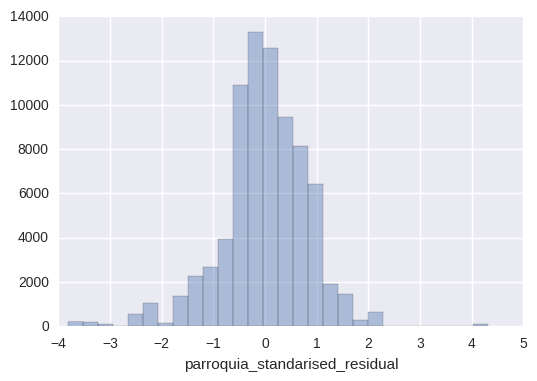

In [13]:
do_SR(df_deltaA)

centros with only 1 mesa:
mean  -0.489166146974
std  1.19699100608

centros with more than 1 mesa:
mean 0.175115881515
std 0.559872129762


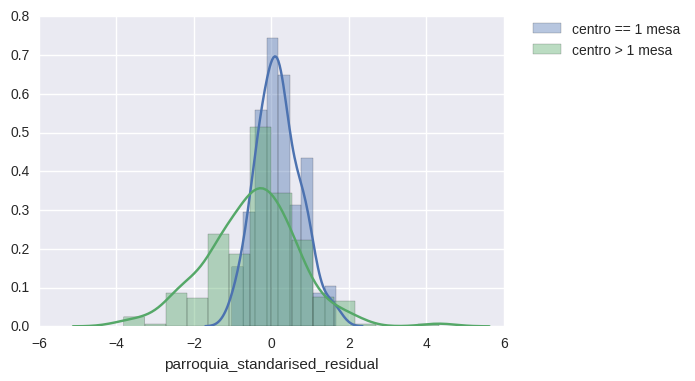

In [14]:
do_SR_mesa(df_deltaA)

## MIRANDA

inclusive data (all mesas)
mean  0.0126756952888
std  1.0
wtf?
number of votes where PSUV results are higher than than 2 standard deviations the average % in that parroquia
25826.0


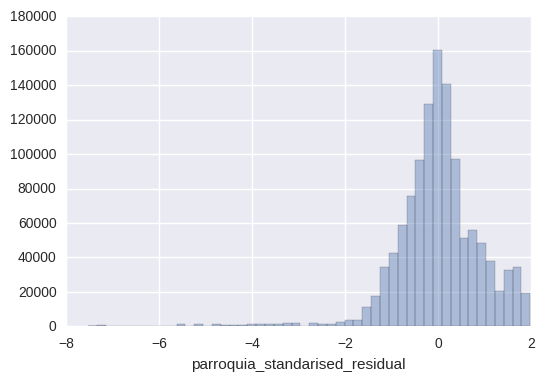

In [19]:
do_SR(df_MIRANDA)

pri
print "wtf?" 
print 'number of votes where PSUV results are higher than than 2 standard deviations the average % in that parroquia'
print df_MIRANDA[df_MIRANDA['parroquia_standarised_residual']<-2]['VOTOS VALIDOS'].sum()


In [ ]:
print wtf

centros with only 1 mesa:
mean  -0.490528289214
std  0.876930925414

centros with more than 1 mesa:
mean 0.0853124115543
std 0.995886563489


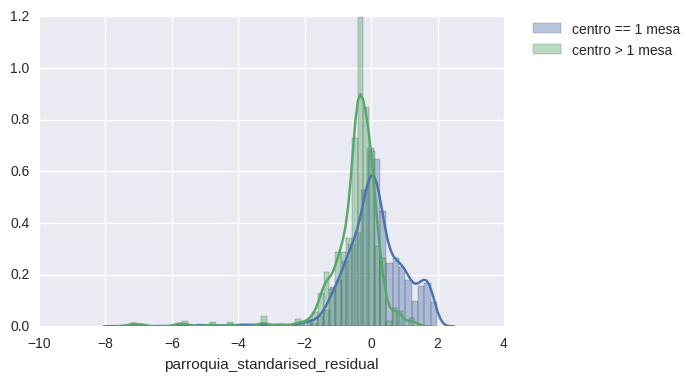

In [16]:
do_SR_mesa(df_MIRANDA)
